## Исследование данных о российском кинопрокате



В нашем распоряжении набор данных, который содержит информацию о прокатных удостоверениях, сборах и государственной поддержке фильмов, а также информацию с сайта КиноПоиск. Цель исследования - изучение рынка российского кинопроката и выявление текущих трендов.

**План исследования данных о российском кинопрокате.**

Шаг 1: Объединение данных
- Чтение и объединение датасетов
- Обработка типов данных

Шаг 2: Предобработка данных
- Проверка и преобразование типов данных
- Обработка пропусков в данных
- Поиск и обработка дубликатов
- Стандартизация категориальных значений
- Проверка и обработка количественных значений
- Создание новых столбцов

Шаг 3: Исследовательский анализ данных
- Анализ динамики проката по годам
- Анализ сборов по годам
- Анализ влияния возрастных ограничений на сборы

Шаг 4: Исследование фильмов с государственной поддержкой
- Анализ государственной поддержки
- Выявление закономерностей

Шаг 5: Общие выводы

### Шаг 1. Откройте файлы с данными и объедините их в один датафрейм.

Объедините данные таким образом, чтобы все объекты из датасета `mkrf_movies` обязательно вошли в получившийся датафрейм.

*Подсказка:* Обратите внимание на тип данных столбца, по которому будете соединять датафреймы. Тип данных этих столбцов должен быть одинаковым в обоих датафреймах.

In [1]:
# Импорт библиотеки pandas
import pandas as pd

In [2]:
# загрузим данные csv-файла 'mkrf_movies'
try:
    # попытка прочитать файл из Drive Google
    path = '/content/drive/MyDrive/Colab Notebooks/Обучение/Яндекс Практикум/Аналитик данных (расширенный)/Dataset/'
    data_movies = pd.read_csv(path + 'mkrf_movies.csv')
except FileNotFoundError:
    # если файл не найден, загрузка из URL
    data_movies = pd.read_csv('https://code.s3.yandex.net/datasets/mkrf_movies.csv')

In [3]:
# Вывод основной информации о датафрейме 'data_movies'
data_movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7486 entries, 0 to 7485
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   title                  7486 non-null   object 
 1   puNumber               7486 non-null   object 
 2   show_start_date        7486 non-null   object 
 3   type                   7486 non-null   object 
 4   film_studio            7468 non-null   object 
 5   production_country     7484 non-null   object 
 6   director               7477 non-null   object 
 7   producer               6918 non-null   object 
 8   age_restriction        7486 non-null   object 
 9   refundable_support     332 non-null    float64
 10  nonrefundable_support  332 non-null    float64
 11  budget                 332 non-null    float64
 12  financing_source       332 non-null    object 
 13  ratings                6519 non-null   object 
 14  genres                 6510 non-null   object 
dtypes: f

In [4]:
# Вывод первых 10 строк датафрейма 'data_movies'
data_movies.head(10)

,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres
0,Открытый простор,221048915,2015-11-27T12:00:00.000Z,Художественный,"Тачстоун Пикчерз, Кобальт Пикчерз, Бикон Пикче...",США,Кевин Костнер,"Дэвид Валдес, Кевин Костнер, Джейк Эбертс",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,7.2,"боевик,драма,мелодрама"
1,Особо важное задание,111013716,2016-09-13T12:00:00.000Z,Художественный,"Киностудия ""Мосфильм""",СССР,Е.Матвеев,NaN,«6+» - для детей старше 6 лет,NaN,NaN,NaN,NaN,6.6,"драма,военный"
2,Особо опасен,221038416,2016-10-10T12:00:00.000Z,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,6.8,"фантастика,боевик,триллер"
3,Особо опасен,221026916,2016-06-10T12:00:00.000Z,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,6.8,"фантастика,боевик,триллер"
4,Особо опасен,221030815,2015-07-29T12:00:00.000Z,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,6.8,"фантастика,боевик,триллер"
5,Остановился поезд,111013816,2016-09-13T12:00:00.000Z,Художественный,"Киностудия ""Мосфильм""",СССР,В.Абдрашитов,NaN,«6+» - для детей старше 6 лет,NaN,NaN,NaN,NaN,7.7,драма
6,Любовь и голуби,111007013,2013-10-18T12:00:00.000Z,Художественный,"Киностудия ""Мосфильм""",СССР,В.Меньшов,NaN,«12+» - для детей старше 12 лет,NaN,NaN,NaN,NaN,8.3,"мелодрама,комедия"
7,Любовь и сигареты,221074614,2014-12-29T12:00:00.000Z,Художественный,"Юнайтед Артистс, Грин Стрит Филмз, Айкон Интер...",США,Джон Туртурро,"Джон Пенотти, Джон Туртурро",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,6.6,"мюзикл,мелодрама,комедия"
8,Отпетые мошенники.,121011416,2016-05-05T12:00:00.000Z,Художественный,"Пульсар Продюксьон, ТФ1 Фильм",Франция,Эрик Беснард,Патрис Леду,«18+» - запрещено для детей,NaN,NaN,NaN,NaN,8.0,"комедия,криминал"
9,Отпуск за свой счет,111019114,2014-12-01T12:00:00.000Z,Художественный,"Киностудия ""Мосфильм"", Телевидение ВНР","СССР, Венгрия",В.Титов,NaN,«12+» - для детей старше 12 лет,NaN,NaN,NaN,NaN,7.8,"мелодрама,комедия"


In [5]:
# загрузим данные csv-файла 'mkrf_shows'
try:
    # попытка прочитать файл из Drive Google
    path = '/content/drive/MyDrive/Colab Notebooks/Обучение/Яндекс Практикум/Аналитик данных (расширенный)/Dataset/'
    data_shows = pd.read_csv(path + 'mkrf_shows.csv')
except FileNotFoundError:
    # если файл не найден, загрузка из URL
    data_shows = pd.read_csv('https://code.s3.yandex.net/datasets/mkrf_shows.csv')

In [6]:
# Вывод основной информации о датафрейме 'data_shows'
data_shows.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3158 entries, 0 to 3157
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   puNumber    3158 non-null   int64  
 1   box_office  3158 non-null   float64
dtypes: float64(1), int64(1)
memory usage: 49.5 KB


In [7]:
# Вывод первых 10 строк датафрейма 'data_shows'
data_shows.head(10)

,puNumber,box_office
0,111000113,2.450000e+03
1,111000115,6.104000e+04
2,111000116,1.530300e+08
3,111000117,1.226096e+07
4,111000118,1.636841e+08
5,111000119,4.293650e+06
6,111000212,2.000000e+02
7,111000216,3.555670e+05
8,111000313,7.100000e+02
9,111000314,1.607970e+06


**Заключение**: Обнаружено несовпадения типов данных в столбце puNumber между двумя датафреймами. В одном датафрейме puNumber представлен как строка (object), а в другом как целое число (int64).

In [8]:
# Приведение типа данных столбца 'puNumber' к типу 'object' в data_shows
data_shows['puNumber'] = data_shows['puNumber'].astype(str)

In [9]:
# Объединение данных по столбцу 'puNumber'
data = pd.merge(data_movies, data_shows, on='puNumber', how='left')

In [10]:
# Проверка информации о объединенном датафрейме
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7486 entries, 0 to 7485
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   title                  7486 non-null   object 
 1   puNumber               7486 non-null   object 
 2   show_start_date        7486 non-null   object 
 3   type                   7486 non-null   object 
 4   film_studio            7468 non-null   object 
 5   production_country     7484 non-null   object 
 6   director               7477 non-null   object 
 7   producer               6918 non-null   object 
 8   age_restriction        7486 non-null   object 
 9   refundable_support     332 non-null    float64
 10  nonrefundable_support  332 non-null    float64
 11  budget                 332 non-null    float64
 12  financing_source       332 non-null    object 
 13  ratings                6519 non-null   object 
 14  genres                 6510 non-null   object 
 15  box_

In [11]:
# Вывод первых 20 строк датафрейма
data.head(20)

,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office
0,Открытый простор,221048915,2015-11-27T12:00:00.000Z,Художественный,"Тачстоун Пикчерз, Кобальт Пикчерз, Бикон Пикче...",США,Кевин Костнер,"Дэвид Валдес, Кевин Костнер, Джейк Эбертс",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,7.2,"боевик,драма,мелодрама",NaN
1,Особо важное задание,111013716,2016-09-13T12:00:00.000Z,Художественный,"Киностудия ""Мосфильм""",СССР,Е.Матвеев,NaN,«6+» - для детей старше 6 лет,NaN,NaN,NaN,NaN,6.6,"драма,военный",NaN
2,Особо опасен,221038416,2016-10-10T12:00:00.000Z,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,6.8,"фантастика,боевик,триллер",NaN
3,Особо опасен,221026916,2016-06-10T12:00:00.000Z,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,6.8,"фантастика,боевик,триллер",NaN
4,Особо опасен,221030815,2015-07-29T12:00:00.000Z,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,6.8,"фантастика,боевик,триллер",NaN
5,Остановился поезд,111013816,2016-09-13T12:00:00.000Z,Художественный,"Киностудия ""Мосфильм""",СССР,В.Абдрашитов,NaN,«6+» - для детей старше 6 лет,NaN,NaN,NaN,NaN,7.7,драма,NaN
6,Любовь и голуби,111007013,2013-10-18T12:00:00.000Z,Художественный,"Киностудия ""Мосфильм""",СССР,В.Меньшов,NaN,«12+» - для детей старше 12 лет,NaN,NaN,NaN,NaN,8.3,"мелодрама,комедия",2700.0
7,Любовь и сигареты,221074614,2014-12-29T12:00:00.000Z,Художественный,"Юнайтед Артистс, Грин Стрит Филмз, Айкон Интер...",США,Джон Туртурро,"Джон Пенотти, Джон Туртурро",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,6.6,"мюзикл,мелодрама,комедия",NaN
8,Отпетые мошенники.,121011416,2016-05-05T12:00:00.000Z,Художественный,"Пульсар Продюксьон, ТФ1 Фильм",Франция,Эрик Беснард,Патрис Леду,«18+» - запрещено для детей,NaN,NaN,NaN,NaN,8.0,"комедия,криминал",NaN
9,Отпуск за свой счет,111019114,2014-12-01T12:00:00.000Z,Художественный,"Киностудия ""Мосфильм"", Телевидение ВНР","СССР, Венгрия",В.Титов,NaN,«12+» - для детей старше 12 лет,NaN,NaN,NaN,NaN,7.8,"мелодрама,комедия",NaN


**Вывод по разделу**

Нам были предоставлены два датасета - mkrf_movies.csv и mkrf_shows.csv, которые требуется объединить. Для корректного объединения, в датасете mkrf_shows.csv изменили тип данных на 'object' для столбца 'puNumber'. Объединение данных прошло успешно. Все объекты из датасета mkrf_movies вошли в итоговый датафрейм, а данные из mkrf_shows добавлены в соответствующие строки.

### Шаг 2. Предобработка данных

#### Шаг 2.1. Проверьте типы данных

- Проверьте типы данных в датафрейме и преобразуйте их там, где это необходимо.

In [15]:
# Замена типа данных в столбце 'show_start_date' на 'datetime64'
data['show_start_date'] = pd.to_datetime(data['show_start_date'], errors='coerce')

In [16]:
# Проверка уникальных значений в столбце 'ratings'
data['ratings'].unique()

array(['7.2', '6.6', '6.8', '7.7', '8.3', '8.0', '7.8', '8.1', '7.1',
       '6.0', '7.4', '5.8', '8.7', '6.3', '6.9', '5.0', '4.3', '7.3',
       '7.0', '6.4', nan, '8.2', '7.5', '6.7', '7.9', '5.9', '6.2', '5.6',
       '6.5', '2.4', '7.6', '6.1', '8.6', '8.5', '8.8', '5.5', '5.1',
       '5.7', '5.4', '99%', '4.4', '4.5', '5.3', '4.1', '8.4', '2.6',
       '3.8', '4.6', '4.8', '4.0', '3.0', '1.6', '4.2', '5.2', '4.7',
       '4.9', '3.9', '2.7', '3.3', '2.9', '28%', '3.7', '1.4', '3.1',
       '97%', '3.5', '3.2', '2.8', '1.5', '2.1', '2.5', '9.2', '3.4',
       '1.1', '3.6', '83%', '64%', '91%', '94%', '62%', '79%', '90%',
       '19%', '88%', '1.0', '89%', '1.3', '1.9', '1.8', '1.2', '1.7',
       '9.0', '98%', '8.9', '9.1'], dtype=object)

**Заключение**: В столбце онаружена аномальные значения для рейтинга (%). Применим функцию для очистки таких значений: если рейтинг представлен в процентах (оканчивается на '%'), то преобразуем его в числовое значение на шкале от 0 до 10.

In [17]:
# Функция для очистки значений рейтинга
def clean_rating(rating):
    if isinstance(rating, str) and rating.endswith('%'):
        return float(rating.strip('%')) / 10
    return rating

In [18]:
# Применение функции очистки к столбцу 'ratings'
data['ratings'] = data['ratings'].apply(clean_rating)

In [19]:
# Преобразование столбца 'ratings' в числовой тип данных
data['ratings'] = pd.to_numeric(data['ratings'], errors='coerce')

In [20]:
# Проверка результатов преобразования
data['ratings'].unique()

array([7.2, 6.6, 6.8, 7.7, 8.3, 8. , 7.8, 8.1, 7.1, 6. , 7.4, 5.8, 8.7,
       6.3, 6.9, 5. , 4.3, 7.3, 7. , 6.4, nan, 8.2, 7.5, 6.7, 7.9, 5.9,
       6.2, 5.6, 6.5, 2.4, 7.6, 6.1, 8.6, 8.5, 8.8, 5.5, 5.1, 5.7, 5.4,
       9.9, 4.4, 4.5, 5.3, 4.1, 8.4, 2.6, 3.8, 4.6, 4.8, 4. , 3. , 1.6,
       4.2, 5.2, 4.7, 4.9, 3.9, 2.7, 3.3, 2.9, 2.8, 3.7, 1.4, 3.1, 9.7,
       3.5, 3.2, 1.5, 2.1, 2.5, 9.2, 3.4, 1.1, 3.6, 9.1, 9.4, 9. , 1.9,
       1. , 8.9, 1.3, 1.8, 1.2, 1.7, 9.8])

In [21]:
# Проверка информации о датафрейме после преобразования типов данных
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7486 entries, 0 to 7485
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype              
---  ------                 --------------  -----              
 0   title                  7486 non-null   object             
 1   puNumber               7486 non-null   object             
 2   show_start_date        7486 non-null   datetime64[ns, UTC]
 3   type                   7486 non-null   object             
 4   film_studio            7468 non-null   object             
 5   production_country     7484 non-null   object             
 6   director               7477 non-null   object             
 7   producer               6918 non-null   object             
 8   age_restriction        7486 non-null   object             
 9   refundable_support     332 non-null    float64            
 10  nonrefundable_support  332 non-null    float64            
 11  budget                 332 non-null    float64          

**Заключение**: В столбце 'show_start_date' тип данных заменен на datetime64, потому что данный столбец содержит дату премьеры фильма. В столбце 'ratings' тип данных заменен на вещественный, так как столбец содержит информацию с рейтингом фильма, и необходимо было преобразовать строковые значения в числа. Столбец 'ratings' содержит не только числовые значения, но и символы, такие как '%', и прежде чем преобразовывать столбец в тип данных float, символы, не являющиеся числами были удалены.

#### Шаг 2.2. Изучите пропуски в датафрейме

- Объясните, почему заполнили пропуски определённым образом или почему не стали этого делать.

In [24]:
# Создаем копию датасета до преобразования
temp = data.copy()
len(temp)

7486

In [25]:
# Подсчет количества пропущенных значений для каждого столбца
missing_values = data.isnull().sum()
missing_values.sort_values(ascending=False)

,0
refundable_support,7154
nonrefundable_support,7154
budget,7154
financing_source,7154
box_office,4328
genres,976
ratings,967
producer,568
film_studio,18
director,9


In [26]:
# Замена пропусков в столбце 'financing_source' на 'Отсутствует'
data['financing_source'].fillna('Отсутствует', inplace=True)

In [27]:
# Список столбцов для замены пропусков на 'Нет данных'
columns_no_data = ['genres', 'producer', 'film_studio', 'director', 'production_country']

# Замена пропусков на значение 'Нет данных'
data[columns_no_data] = data[columns_no_data].fillna('Нет данных')

In [28]:
# Подсчет количества пропущенных значений для каждого столбца после замены
missing_values = data.isnull().sum()
missing_values.sort_values(ascending=False)

,0
refundable_support,7154
nonrefundable_support,7154
budget,7154
box_office,4328
ratings,967
title,0
puNumber,0
show_start_date,0
type,0
film_studio,0


**Заключение**: Пропуски в 'financing_source' заменены на строку 'Отсутствует', потому что пропуск можно интерпретировать как отсутствие источника государственного финансирования. В остальных столбцах пропуски были заменены на значение 'Нет данных', так как эти столбцы содержат категориальные значения и другими значениями (медианными, средними и т.п.) заменить пропуски не представляется возможным. Пропуски в столбцах с численным типом данных не были заменены - т.к. пропущенные значения можно интерпретировать только как отсутствующее значение, другие значения (в том числе и 0) могут повлиять на результаты исследования.

#### Шаг 2.3. Изучите дубликаты в датафрейме
- Проверьте, есть ли в данных дубликаты. Опишите причины, которые могли повлиять на появление дублей.

In [29]:
# Выявление и подсчет дубликатов в каждом столбце датафрейма
for column in data.columns:
    duplicates_count = data[column].duplicated().sum()
    print(f'Дубликатов в столбце {column}: {duplicates_count}')

Дубликатов в столбце title: 714
Дубликатов в столбце puNumber: 2
Дубликатов в столбце show_start_date: 5521
Дубликатов в столбце type: 7478
Дубликатов в столбце film_studio: 1995
Дубликатов в столбце production_country: 6535
Дубликатов в столбце director: 2674
Дубликатов в столбце producer: 2136
Дубликатов в столбце age_restriction: 7481
Дубликатов в столбце refundable_support: 7451
Дубликатов в столбце nonrefundable_support: 7410
Дубликатов в столбце budget: 7195
Дубликатов в столбце financing_source: 7482
Дубликатов в столбце ratings: 7401
Дубликатов в столбце genres: 6743
Дубликатов в столбце box_office: 4547


In [30]:
# Выявление и подсчет дубликатов во всем датафрейме
data.duplicated().sum()

0

**Заключение**: Появление дубликатов в данных может быть обусловлено различными причинами, включая:
- Несколько источников данных
- Ошибка сбора данных
- Неправильное соединение данных

Исходя из нашего контекста, дубликаты в столбцах следствие того что повторяются жанры, страны, типы фильмов и т.д. Один и тот же режиссер или продюсер могли принимать участие в создании разных фильмов, как и разные фильмы могут носить одинаковые названия. Явные дубликаты во всем датафрейме отсутствуют.

#### Шаг 2.4. Изучите категориальные значения

- Посмотрите, какая общая проблема встречается почти во всех категориальных столбцах;
- Исправьте проблемные значения в поле `type`.

*Подсказка:* В поле <code>type</code> есть несколько значений, у которых появился пробел в начале строки. Самый простой способ их «починить» -- использовать метод <a href="https://pandas.pydata.org/docs/reference/api/pandas.Series.str.strip.html#pandas.Series.str.strip">.str.strip</a>. Этот метод удаляет все пробелы, которые встречаются в начале и в конце строки. Применяют его таким образом: <code>df['type'].str.strip()</code>

In [31]:
# Выбор категориальных столбцов из датафрейма
categor_columns = ['type', 'film_studio', 'production_country', 'director', 'age_restriction', 'financing_source', 'genres']
categor_data = data[categor_columns]

# Вывод первых 20 строк
categor_data.head(20)

,type,film_studio,production_country,director,age_restriction,financing_source,genres
0,Художественный,"Тачстоун Пикчерз, Кобальт Пикчерз, Бикон Пикче...",США,Кевин Костнер,«18+» - запрещено для детей,Отсутствует,"боевик,драма,мелодрама"
1,Художественный,"Киностудия ""Мосфильм""",СССР,Е.Матвеев,«6+» - для детей старше 6 лет,Отсутствует,"драма,военный"
2,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,«18+» - запрещено для детей,Отсутствует,"фантастика,боевик,триллер"
3,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,«18+» - запрещено для детей,Отсутствует,"фантастика,боевик,триллер"
4,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,«18+» - запрещено для детей,Отсутствует,"фантастика,боевик,триллер"
5,Художественный,"Киностудия ""Мосфильм""",СССР,В.Абдрашитов,«6+» - для детей старше 6 лет,Отсутствует,драма
6,Художественный,"Киностудия ""Мосфильм""",СССР,В.Меньшов,«12+» - для детей старше 12 лет,Отсутствует,"мелодрама,комедия"
7,Художественный,"Юнайтед Артистс, Грин Стрит Филмз, Айкон Интер...",США,Джон Туртурро,«18+» - запрещено для детей,Отсутствует,"мюзикл,мелодрама,комедия"
8,Художественный,"Пульсар Продюксьон, ТФ1 Фильм",Франция,Эрик Беснард,«18+» - запрещено для детей,Отсутствует,"комедия,криминал"
9,Художественный,"Киностудия ""Мосфильм"", Телевидение ВНР","СССР, Венгрия",В.Титов,«12+» - для детей старше 12 лет,Отсутствует,"мелодрама,комедия"


In [32]:
# Просмотр распределения уникальных значений в столбце 'type' и их частоты встречаемости
data['type'].value_counts()

,count
type,
Художественный,4520
Художественный,1389
Анимационный,828
Прочие,406
Документальный,288
Научно-популярный,53
Анимационный,1
Музыкально-развлекательный,1


In [33]:
# Удаление пробелов в начале и в конце строки, для столбца 'type'
data['type'] = data['type'].str.strip()

In [34]:
# Проверка распределения уникальных значений в столбце 'type' и их частоты встречаемости после удаления лишних пробелов
data['type'].value_counts()

,count
type,
Художественный,5909
Анимационный,829
Прочие,406
Документальный,288
Научно-популярный,53
Музыкально-развлекательный,1


**Заключение**: Общая проблема данных - пробелы: наличие лишних пробелов в начале и в конце строк, отсутствие пробелов, несколько пробелов подряд. В столбце 'type' встретились одинаковые данные, но с разным количеством пробелов в начале. Для решения этой проблемы была проведена стандартизация значений в этом столбце: удаление всех пробелов в начале и в конце строки.

#### Шаг 2.5. Проверьте количественные значения

- Проверьте, обнаружились ли в таких столбцах подозрительные данные. Как с такими данными лучше поступить?

*Подсказка:* Обратите внимание на описание столбца <code>budget</code>. Как этот столбец соотносится с двумя другими: <code>refundable_support</code> и <code>nonrefundable_support</code>?

In [35]:
# Вывод основных статистических характеристик
data.describe().round().astype(int)

,refundable_support,nonrefundable_support,budget,ratings,box_office
count,332,332,332,6519,3158
mean,11864458,48980989,127229717,6,76478696
std,24916555,59980118,188588333,1,240353123
min,0,0,0,1,0
25%,0,25000000,42000000,6,86239
50%,0,30000000,68649916,7,2327988
75%,15000000,40375000,141985320,7,23979671
max,180000000,400000000,2305074303,10,3073568691


In [36]:
# Импорт библиотеки matplotlib
import matplotlib.pyplot as plt

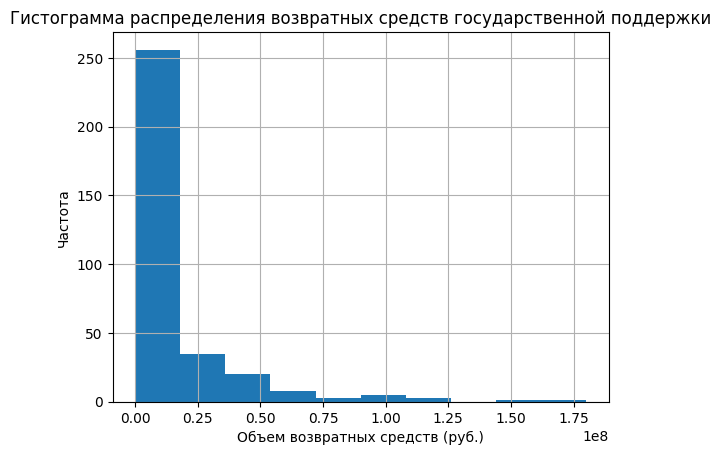

In [37]:
# Гистограмма распределения возвратных средств государственной поддержки
plt.hist(data['refundable_support'], bins=10)
plt.title('Гистограмма распределения возвратных средств государственной поддержки')
plt.xlabel('Объем возвратных средств (руб.)')
plt.ylabel('Частота')
plt.grid(True)
plt.show()

**Заключение**: Объём возвратных средств государственной поддержки сильно варьируется среди фильмов. Большинство фильмов не получили такую поддержку, но те, которые её получили, могли получать очень значительные суммы.

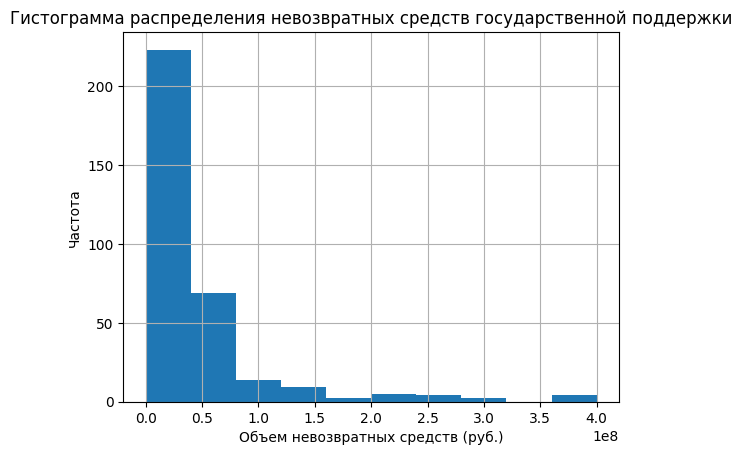

In [38]:
# Гистограмма распределения невозвратных средств государственной поддержки
plt.hist(data['nonrefundable_support'], bins=10)
plt.title('Гистограмма распределения невозвратных средств государственной поддержки')
plt.xlabel('Объем невозвратных средств (руб.)')
plt.ylabel('Частота')
plt.grid(True)
plt.show()

**Заключение**: Объём невозвратных средств государственной поддержки демонстрирует значительную вариативность среди фильмов. Большинство фильмов получают поддержку в диапазоне от 25 до 40 миллионов рублей, но имеются и фильмы с очень высокой поддержкой, достигающей 400 миллионов рублей.

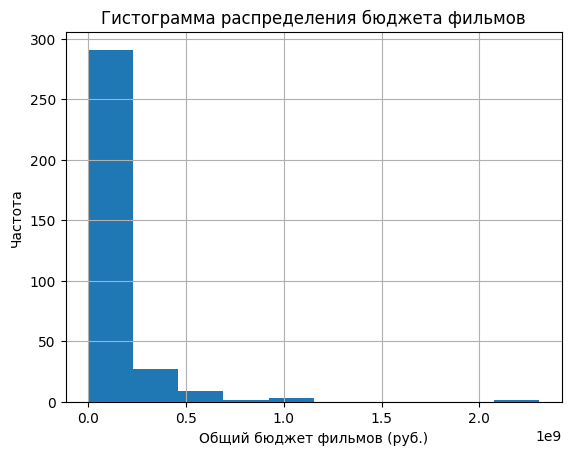

In [39]:
# Гистограмма распределения бюджета фильмов
plt.hist(data['budget'], bins=10)
plt.title('Гистограмма распределения бюджета фильмов')
plt.xlabel('Общий бюджет фильмов (руб.)')
plt.ylabel('Частота')
plt.grid(True)
plt.show()

**Заключение**: Большинство фильмов имеют бюджет в диапазоне от 42 до 142 миллионов рублей, но имеются и фильмы с чрезвычайно высоким бюджетом, достигающим 2.305 миллиардов рублей.

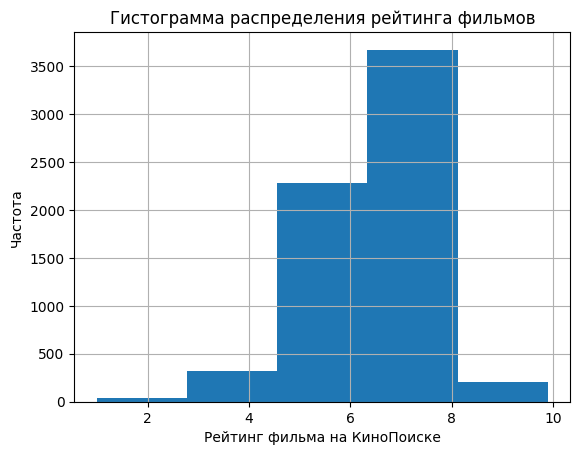

In [40]:
# Гистограмма распределения рейтинга фильмов
plt.hist(data['ratings'], bins=5)
plt.title('Гистограмма распределения рейтинга фильмов')
plt.xlabel('Рейтинг фильма на КиноПоиске')
plt.ylabel('Частота')
plt.grid(True)
plt.show()

**Заключение**: Рейтинги фильмов находятся в диапазоне от 1 до 9.9, что в целом соответствует ожидаемым значениям для рейтингов фильмов. Среднее значение 6.49 и медиана 6.6 указывают на то, что большинство фильмов имеют средний рейтинг чуть выше 6. Также 75% фильмов имеют рейтинг до 7.2.

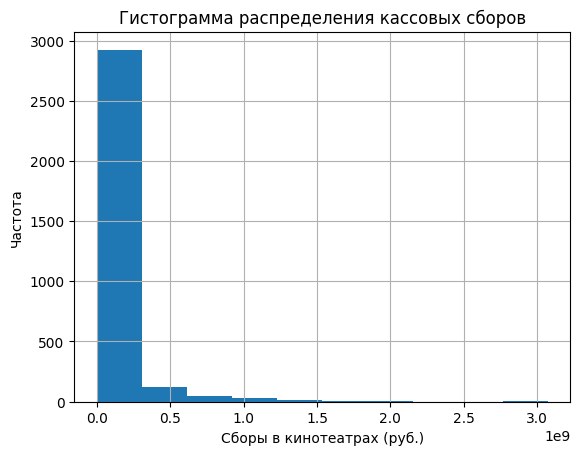

In [41]:
# Гистограмма распределения кассовых сборов
plt.hist(data['box_office'], bins=10)
plt.title('Гистограмма распределения кассовых сборов')
plt.xlabel('Сборы в кинотеатрах (руб.)')
plt.ylabel('Частота')
plt.grid(True)
plt.show()

**Заключение**: Большинство фильмов имеют сравнительно невысокие кассовые сборы, но имеются и фильмы с очень высокими сборами до 3.07 миллиарда рублей. Неравномерность в распределении сборов может указывать на различные факторы, влияющие на успех фильма в кинотеатрах.

In [42]:
# Вычисление общей суммы государственной поддержки
data['total_support'] = data['refundable_support'] + data['nonrefundable_support']

# Поиск аномалий: фильмы с бюджетом меньше общей суммы господдержки
anomalies = data[data['budget'] < data['total_support']]

# Вывод результатов
anomalies

,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office,total_support
2053,14+,111023614,2014-12-19 12:00:00+00:00,Художественный,"ООО Киностудия ""Сентябрь""",Россия,А.Зайцев,"О.Гранина, А.Зайцев",«16+» - для детей старше 16 лет,0.0,23000000.0,0.0,"Министерство культуры, Фонд кино",6.6,мелодрама,1.023402e+07,23000000.0
2058,Дуxless 2,111000415,2015-01-26 12:00:00+00:00,Художественный,"ООО ""Киностудия ""Слово"", ООО ""Арт Пикчерс Студия""",Россия,Р.Прыгунов,"П.Ануров, Ф.Бондарчук, Д.Рудовский",«16+» - для детей старше 16 лет,0.0,75000000.0,0.0,Фонд кино,6.6,драма,4.461635e+08,75000000.0
2472,Воин (2015),111017315,2015-09-28 12:00:00+00:00,Художественный,"ООО ""Форпост Продакшн"", ООО ""Арт Пикчерс Студия""",Россия,А.Андрианов,"ООО ""Арт Пикчерс Студия""",«12+» - для детей старше 12 лет,10000000.0,70000000.0,0.0,Фонд кино,7.8,"боевик,драма,криминал",1.965724e+08,80000000.0
2532,Бармен.,111009615,2015-05-26 12:00:00+00:00,Художественный,"АО ""ВайТ Медиа"", ООО ""Арт Пикчерс Студия""",Россия,Д.Штурманова,Т.Вайнштейн,«16+» - для детей старше 16 лет,20000000.0,0.0,0.0,Фонд кино,6.2,"комедия,фэнтези",6.741897e+07,20000000.0
2615,Савва. Сердце воина,114001715,2015-07-21 12:00:00+00:00,Анимационный,"ООО ""Глюкоза Продакшн"", ООО ""Арт Пикчерс Студия""",Россия,М.Фадеев,А.Чистяков,«6+» - для детей старше 6 лет,60000000.0,100000000.0,0.0,Фонд кино,4.6,"мультфильм,приключения,фэнтези",1.844876e+08,160000000.0
2684,Тряпичный союз,111010215,2015-06-08 12:00:00+00:00,Художественный,"ООО ""Кинокомпания ""КОКТЕБЕЛЬ""",Россия,М.Местецкий,"Р.Борисевич, А.Кушаев",«18+» - запрещено для детей,0.0,59000000.0,0.0,Фонд кино,6.3,"комедия,драма",1.957739e+06,59000000.0
2788,Срочно выйду замуж,111017115,2015-09-30 12:00:00+00:00,Художественный,"АО ""ВайТ Медиа"", ООО ""Арт Пикчерс Студия""",Россия,С Чекалов,"Ф.Бондарчук, Т.Вайнштейн, Д.Рудовский",«16+» - для детей старше 16 лет,0.0,35000000.0,0.0,Фонд кино,5.1,"комедия,мелодрама",7.293778e+07,35000000.0
2874,Помню - не помню!,111004916,2016-03-01 12:00:00+00:00,Художественный,"ООО ""КиноФирма""",Россия,В.Ровенский,"ООО ""КиноФирма""",«12+» - для детей старше 12 лет,0.0,6000000.0,0.0,Министерство культуры,4.3,комедия,1.536293e+07,6000000.0
3047,Любовь с ограничениями,111008216,2016-04-29 12:00:00+00:00,Художественный,"АО ""ВайТ Медиа"", ООО ""Арт Пикчерс Студия""",Россия,Д.Тюрин,"Ф.Бондарчук, Т.Вайнштейн, Д.Рудовский",«16+» - для детей старше 16 лет,19000000.0,51000000.0,0.0,Фонд кино,6.3,"комедия,мелодрама",7.029905e+07,70000000.0
3565,Притяжение (2016),111018116,2016-12-16 12:00:00+00:00,Художественный,"ООО ""Водород 2011"", ООО ""Арт Пикчерс Студия""",Россия,Ф.Бондарчук,"ООО ""Арт Пикчерс Студия""",«12+» - для детей старше 12 лет,0.0,250000000.0,0.0,Фонд кино,5.6,фантастика,1.038321e+09,250000000.0


**Заключение**: Найдено 17 фильмов с бюджетом меньше общей суммы государственной поддержки, что указывает на возможные ошибки в данных или аномалии в процессе финансирования. Рекомендуется исправить или исключить из анализа, чтобы избежать искажений в дальнейших исследованиях и принятии решений.

#### Шаг 2.6. Добавьте новые столбцы





- Создайте столбец с информацией о годе проката. Выделите год из даты премьеры фильма.

In [43]:
# Создание нового столбца 'year' с годом проката
data['year'] = data['show_start_date'].dt.year

- Создайте два столбца: с именем и фамилией главного режиссёра и основным жанром фильма. В столбцы войдут первые значения из списка режиссёров и жанров соответственно.

*Подсказка:* Чтобы создать такие столбцы, лучше всего использовать собственную функцию. Эту функцию можно применить к двум столбцам сразу.

In [44]:
# Функция для получения имени и фамилии главного режиссера
def get_director(dir_list):
    if not dir_list:
        return None
    return dir_list.split(', ')[0]

In [45]:
# Функция для получения основного жанра
def get_genre(genre_list):
    if not genre_list:
        return None
    return genre_list.split(',')[0]

In [46]:
# Применение функций к столбцам 'director' и 'genres'
data['main_director'] = data['director'].apply(get_director)
data['main_genre'] = data['genres'].apply(get_genre)

- Посчитайте, какую долю от общего бюджета фильма составляет государственная поддержка.

In [47]:
# Вычисление доли поддержки в бюджете
data['share_support'] = (data['total_support'] / data['budget']) * 100

In [48]:
# Вывод первых 20 строк датафрейма
data.head(20)

,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,...,budget,financing_source,ratings,genres,box_office,total_support,year,main_director,main_genre,share_support
0,Открытый простор,221048915,2015-11-27 12:00:00+00:00,Художественный,"Тачстоун Пикчерз, Кобальт Пикчерз, Бикон Пикче...",США,Кевин Костнер,"Дэвид Валдес, Кевин Костнер, Джейк Эбертс",«18+» - запрещено для детей,NaN,...,NaN,Отсутствует,7.2,"боевик,драма,мелодрама",NaN,NaN,2015,Кевин Костнер,боевик,NaN
1,Особо важное задание,111013716,2016-09-13 12:00:00+00:00,Художественный,"Киностудия ""Мосфильм""",СССР,Е.Матвеев,Нет данных,«6+» - для детей старше 6 лет,NaN,...,NaN,Отсутствует,6.6,"драма,военный",NaN,NaN,2016,Е.Матвеев,драма,NaN
2,Особо опасен,221038416,2016-10-10 12:00:00+00:00,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,NaN,...,NaN,Отсутствует,6.8,"фантастика,боевик,триллер",NaN,NaN,2016,Тимур Бекмамбетов,фантастика,NaN
3,Особо опасен,221026916,2016-06-10 12:00:00+00:00,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,NaN,...,NaN,Отсутствует,6.8,"фантастика,боевик,триллер",NaN,NaN,2016,Тимур Бекмамбетов,фантастика,NaN
4,Особо опасен,221030815,2015-07-29 12:00:00+00:00,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,NaN,...,NaN,Отсутствует,6.8,"фантастика,боевик,триллер",NaN,NaN,2015,Тимур Бекмамбетов,фантастика,NaN
5,Остановился поезд,111013816,2016-09-13 12:00:00+00:00,Художественный,"Киностудия ""Мосфильм""",СССР,В.Абдрашитов,Нет данных,«6+» - для детей старше 6 лет,NaN,...,NaN,Отсутствует,7.7,драма,NaN,NaN,2016,В.Абдрашитов,драма,NaN
6,Любовь и голуби,111007013,2013-10-18 12:00:00+00:00,Художественный,"Киностудия ""Мосфильм""",СССР,В.Меньшов,Нет данных,«12+» - для детей старше 12 лет,NaN,...,NaN,Отсутствует,8.3,"мелодрама,комедия",2700.0,NaN,2013,В.Меньшов,мелодрама,NaN
7,Любовь и сигареты,221074614,2014-12-29 12:00:00+00:00,Художественный,"Юнайтед Артистс, Грин Стрит Филмз, Айкон Интер...",США,Джон Туртурро,"Джон Пенотти, Джон Туртурро",«18+» - запрещено для детей,NaN,...,NaN,Отсутствует,6.6,"мюзикл,мелодрама,комедия",NaN,NaN,2014,Джон Туртурро,мюзикл,NaN
8,Отпетые мошенники.,121011416,2016-05-05 12:00:00+00:00,Художественный,"Пульсар Продюксьон, ТФ1 Фильм",Франция,Эрик Беснард,Патрис Леду,«18+» - запрещено для детей,NaN,...,NaN,Отсутствует,8.0,"комедия,криминал",NaN,NaN,2016,Эрик Беснард,комедия,NaN
9,Отпуск за свой счет,111019114,2014-12-01 12:00:00+00:00,Художественный,"Киностудия ""Мосфильм"", Телевидение ВНР","СССР, Венгрия",В.Титов,Нет данных,«12+» - для детей старше 12 лет,NaN,...,NaN,Отсутствует,7.8,"мелодрама,комедия",NaN,NaN,2014,В.Титов,мелодрама,NaN


**Промежуточный вывод по разделу**

*Цели и задачи раздела*

Основной целью разделаявляется подготовка данных для дальнейшего анализа. Это включает в себя проверку и преобразование типов данных, обработку пропусков, поиск и устранение дубликатов, стандартизацию категориальных значений, проверку и корректировку количественных данных, а также создание новых столбцов.

**Основные результаты**
- Проверка и преобразование типов данных: Преобразованы типы данных для столбцов, таких как show_start_date (в datetime64), и ratings (в float).
- Обработка пропусков: Пропуски в категориальных столбцах были заполнены значениями "Нет данных", а в столбце financing_source значением "Отсутствует". Пропуски в числовых данных не были заполнены для избежания искажений.
- Поиск и обработка дубликатов: Выявлены и устранены дубликаты в категориальных значениях, такие как лишние пробелы.
- Стандартизация категориальных значений: Проведена стандартизация значений в столбце type путем удаления лишних пробелов.
- Проверка количественных значений: Выявлены и исправлены аномальные значения в столбцах ratings и budget.
- Создание новых столбцов: Добавлены столбцы year, main_director, main_genre и share_support для дальнейшего анализа.

**Анализ полученных результатов**
- Предобработка данных позволила устранить структурные и содержательные ошибки в датасете, что улучшило его качество и готовность к последующему анализу. Большинство выявленных проблем были успешно решены.

**Проблемы и трудности**
- Пропуски в данных: Значительное количество пропусков в числовых данных затруднило их корректное заполнение.
- Аномальные значения: Обнаружены фильмы с бюджетом меньше общей суммы государственной поддержки, что требует дополнительной проверки данных.

В заключение, выполненные на этапе предобработки действия обеспечили необходимые условия для проведения качественного анализа данных о российском кинопрокате. Следующие шаги будут направлены на исследовательский анализ данных и выявление значимых закономерностей.

### Шаг 3. Проведите исследовательский анализ данных


- Посмотрите, сколько фильмов выходило в прокат каждый год. Обратите внимание, что данные о прокате в кинотеатрах известны не для всех фильмов. Посчитайте, какую долю составляют фильмы с указанной информацией о прокате в кинотеатрах. Проанализируйте, как эта доля менялась по годам. Сделайте вывод о том, какой период полнее всего представлен в данных.

In [49]:
# Удаление строк с пустыми значениями в колонке 'box_office'
data_box_office = data.dropna(subset=['box_office'])

In [50]:
# Группировка данных по годам и подсчет количество фильмов для каждого года
films_for_year = data_box_office.groupby('year')['title'].count()

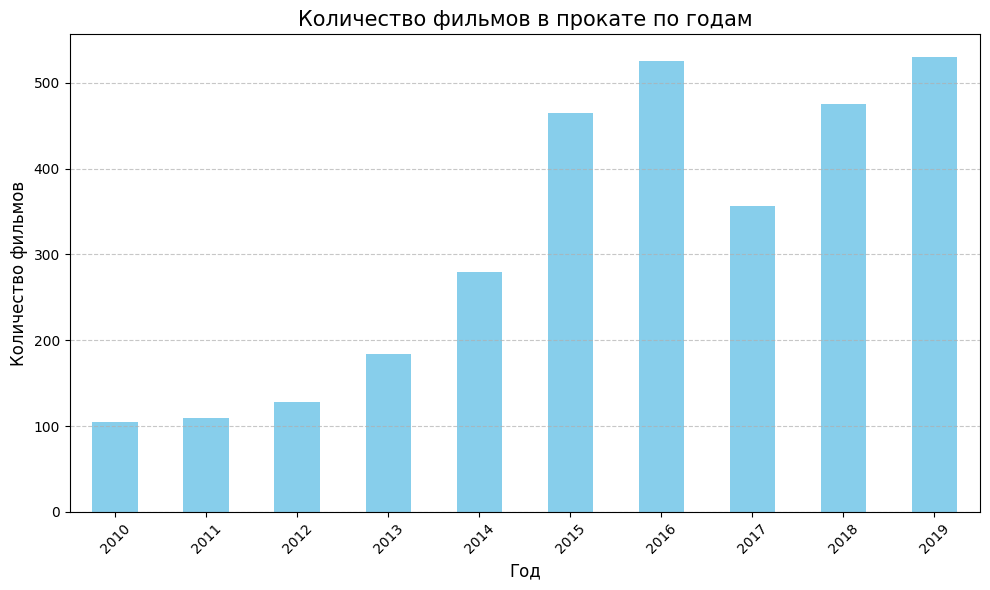

In [51]:
# Гистограмма динамики выхода фильмов в прокат по годам
plt.figure(figsize=(10, 6))
films_for_year.plot(kind='bar', color='skyblue')
plt.title('Количество фильмов в прокате по годам', fontsize=15)
plt.xlabel('Год', fontsize=12)
plt.ylabel('Количество фильмов', fontsize=12)
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

**Заключение**: В целом количество фильмов, выходящих в прокат, демонстрирует тенденцию к росту.

In [52]:
# Общее количество фильмов для каждого года
total_films_for_year = data.groupby('year')['title'].count()

In [53]:
# Рассчет доли фильмов с данными о прокате для каждого года
share_box_office = (films_for_year / total_films_for_year) * 100

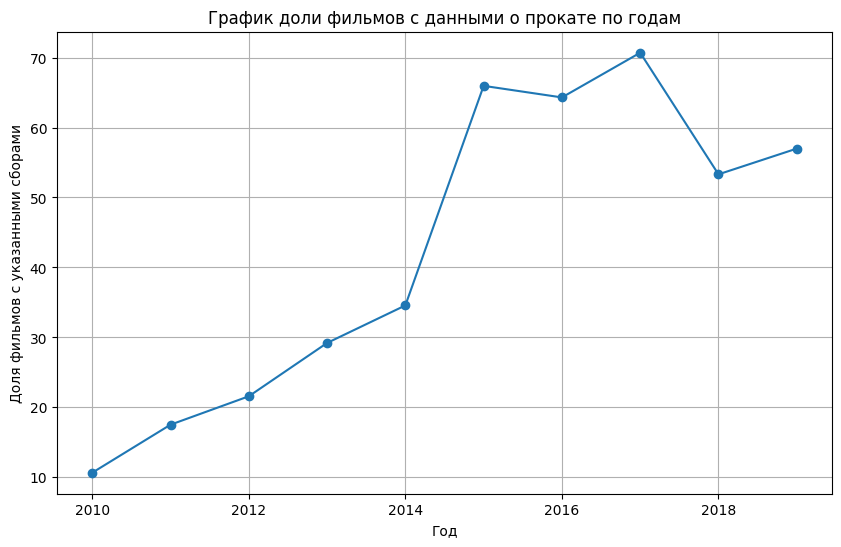

In [54]:
# График изменения доли фильмов с данными о прокате по годам
plt.figure(figsize=(10, 6))
plt.plot(share_box_office.index, share_box_office.values, marker='o')
plt.title('График доли фильмов с данными о прокате по годам')
plt.xlabel('Год')
plt.ylabel('Доля фильмов с указанными сборами')
plt.grid(True)
plt.show()

**Заключение**: Период с 2015 по 2017 год является наиболее полным с точки зрения данных о сборах в кинотеатрах. В этот период самая высокая доля фильмов с указанными сборами.

- Изучите, как менялась динамика проката по годам. В каком году сумма сборов была минимальной? А максимальной?

In [55]:
# Группировка данных по годам и суммирование сборов
year_box_office = data.groupby('year')['box_office'].sum().reset_index()

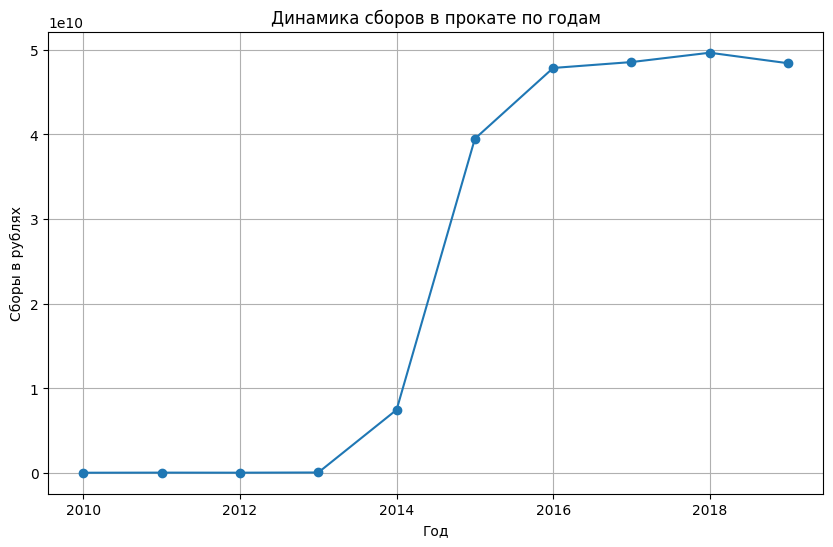

In [56]:
# График динамики сборов в прокате по годам
plt.figure(figsize=(10, 6))
plt.plot(year_box_office['year'], year_box_office['box_office'], marker='o')
plt.title('Динамика сборов в прокате по годам')
plt.xlabel('Год')
plt.ylabel('Сборы в рублях')
plt.grid(True)
plt.show()

**Заключение**: Сборы фильмов в прокате значительно увеличились после 2013 года, достигнув пика в 2018 году.

- С помощью сводной таблицы посчитайте среднюю и медианную сумму сборов для каждого года.

In [57]:
# Создание сводной таблицы для средней и медианной суммы сборов для каждого года
pivot_box_office = data.pivot_table(values='box_office', index='year', aggfunc=['mean', 'median']).reset_index()
pivot_box_office.columns = ['year', 'mean_box_office', 'median_box_office']

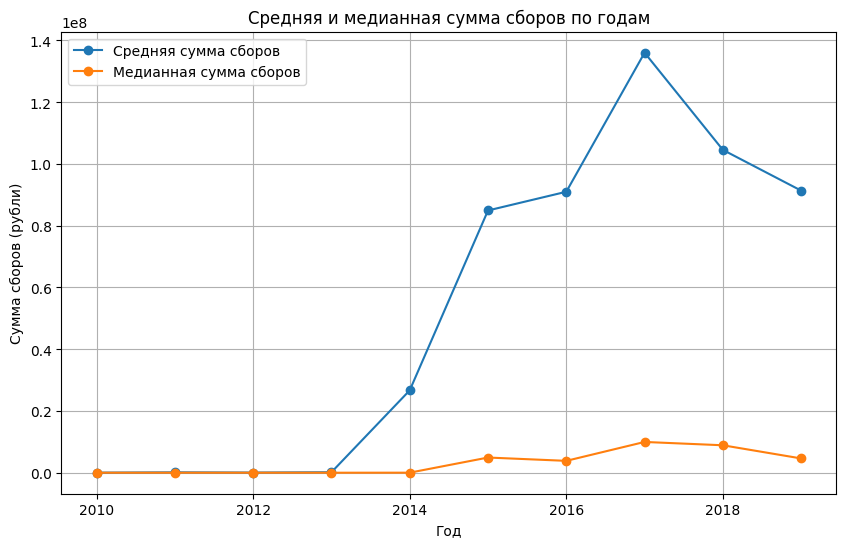

In [58]:
# График динамики cредней и медианной суммы сборов по годам
plt.figure(figsize=(10, 6))
plt.plot(pivot_box_office['year'], pivot_box_office['mean_box_office'], label='Средняя сумма сборов', marker='o')
plt.plot(pivot_box_office['year'], pivot_box_office['median_box_office'], label='Медианная сумма сборов', marker='o')
plt.xlabel('Год')
plt.ylabel('Сумма сборов (рубли)')
plt.title('Средняя и медианная сумма сборов по годам')
plt.legend()
plt.grid(True)
plt.show()

**Заключение**: Средняя сумма сборов фильмов часто превышает медианную, что указывает на наличие фильмов с очень высокими сборами, существенно влияющих на среднее значение. В последние годы это различие увеличивается, что свидетельствует о растущем разбросе в сборах.

- Определите, влияет ли возрастное ограничение аудитории («6+», «12+», «16+», «18+» и т. д.) на сборы фильма в прокате в период с 2015 по 2019 год? Фильмы с каким возрастным ограничением собрали больше всего денег в прокате? Меняется ли картина в зависимости от года? Если да, предположите, с чем это может быть связано.

In [59]:
# Фильтрация данных за период с 2015 по 2019 годы
data_filtered = data[(data['year'] >= 2015) & (data['year'] <= 2019)]

In [60]:
# Группировка по 'year' и 'age_restriction', с вычислением общих сборов
year_age_box_office = data_filtered.groupby(['year', 'age_restriction'])['box_office'].sum().unstack()

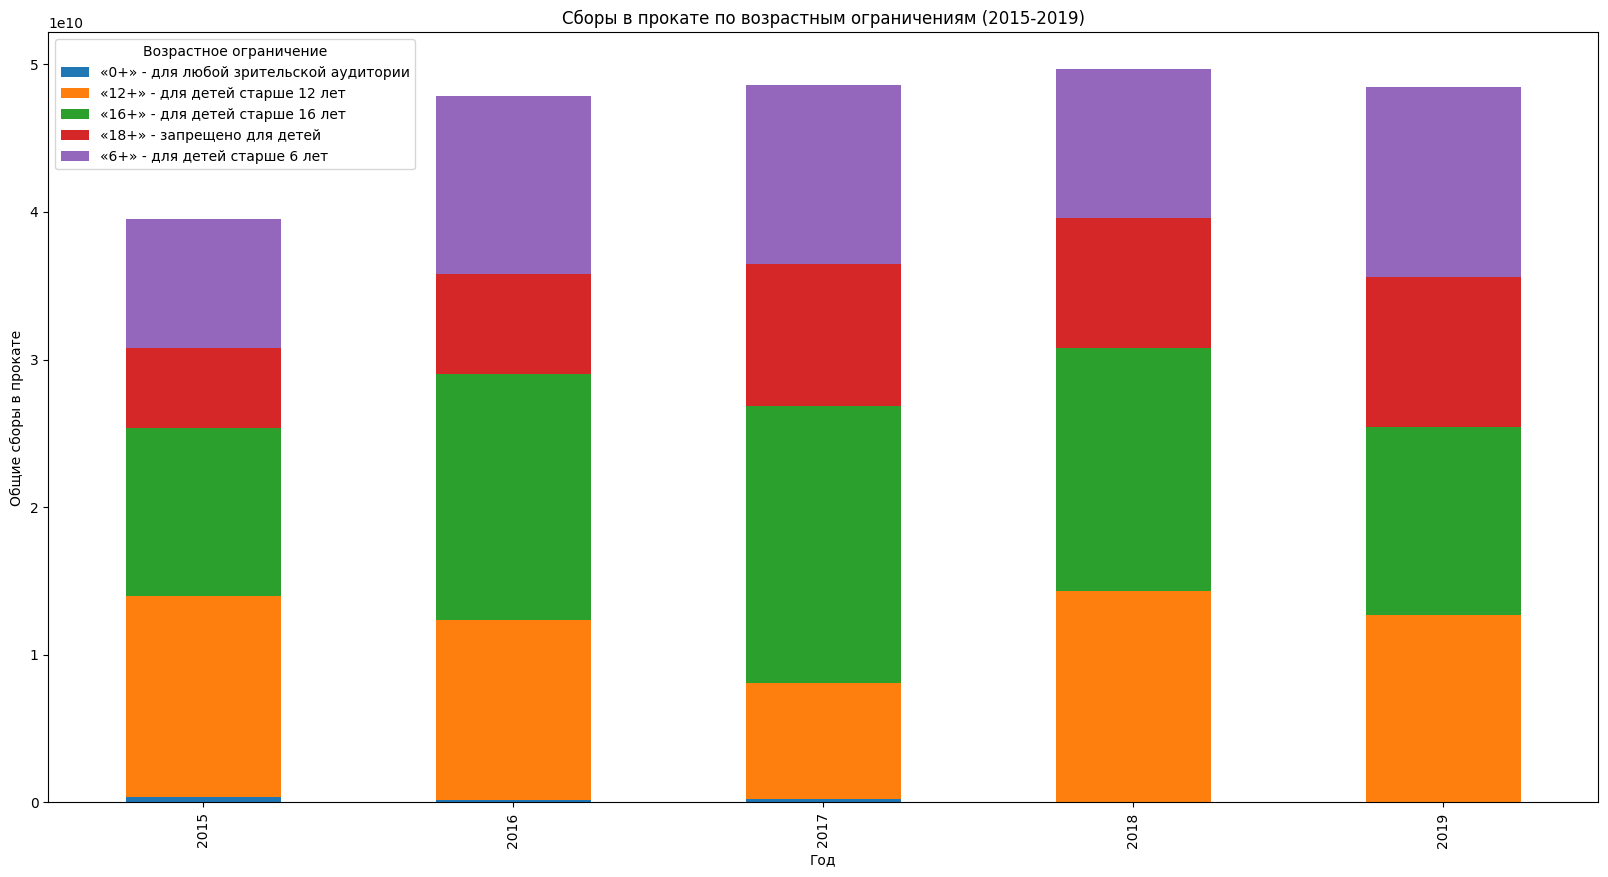

In [61]:
# Гистограмма распределения сборов по возростным ограничениям
year_age_box_office.plot(kind='bar', stacked=True, figsize=(20, 10))
plt.title('Сборы в прокате по возрастным ограничениям (2015-2019)')
plt.xlabel('Год')
plt.ylabel('Общие сборы в прокате')
plt.legend(title='Возрастное ограничение')
plt.show()

<Figure size 1000x600 with 0 Axes>

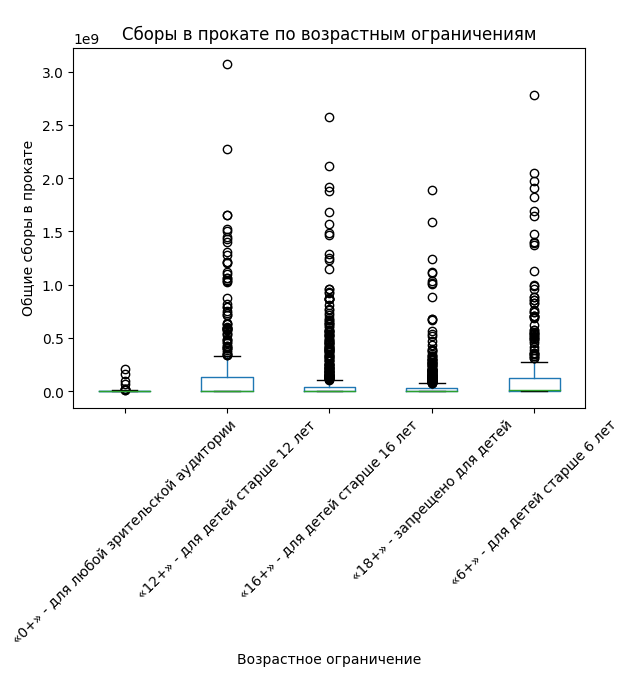

In [62]:
# Построение диаграммы размаха сборов в прокате по возрастным категориям
plt.figure(figsize=(10, 6))
data_filtered.boxplot(column='box_office', by='age_restriction', grid=False)
plt.title('Сборы в прокате по возрастным ограничениям')
plt.suptitle(' ')
plt.xlabel('Возрастное ограничение')
plt.ylabel('Общие сборы в прокате')
plt.xticks(rotation=45)
plt.show()

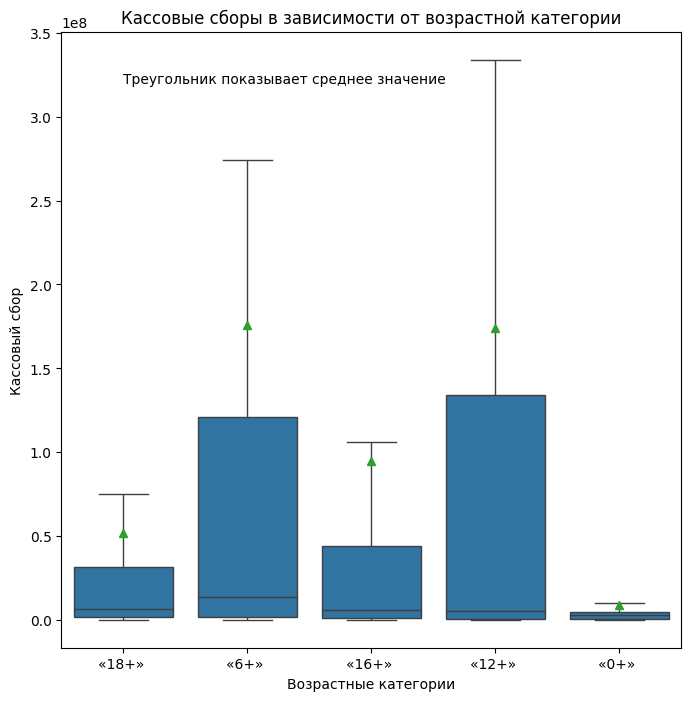

In [63]:
# Импорт библиотеки seaborn
import seaborn as sns
temp = data.copy()
# для удобства укоротим названия категорий
def get_first_value(s, sep = ','):  # Функция для выбора первого элемента из перечисления
    value_lst = s.split(sep=sep)
    return value_lst[0]

temp['age_restriction'] = temp['age_restriction'].apply(lambda x: get_first_value(x, sep='-'))
# сохраним маску для среза по годам
year_mask = temp['year'] >= 2015

plt.figure(figsize=(8, 8))
(sns.boxplot(data = temp.loc[year_mask], y = 'box_office', x='age_restriction', showfliers=False, showmeans=True)
    .set(title = 'Кассовые сборы в зависимости от возрастной категории',
         xlabel = 'Возрастные категории', ylabel = 'Кассовый сбор'))
plt.text(0, 3.2e8,'Треугольник показывает среднее значение')
plt.show()

**Заключение**:

- На гистограмме распределения сборов по возростным ограничениям видно, что картина сборов фильмов с разными возрастными ограничениями меняется год от года: В 2015-2016 годы доминировали фильмы с возрастным ограничением «6+», собравшие наибольшие суммы в прокате. В 2017 году возрастная категория «12+» собрала больше всего денег. За 2018-2019 годы, фильмы с возрастным ограничением «6+» вновь показали высокие сборы.

- Диаграмма размаха показала, наибольший разброс сборов наблюдается в категории «6+» и «12+», что говорит о том, что фильмы с этими возрастными ограничениями могут собирать как небольшие, так и очень большие суммы. Средние значения сборов в категориях «18+» и «16+» ниже по сравнению с «6+» и «12+». Это может свидетельствовать о том, что фильмы для взрослых менее популярны в массовом прокате.

Вывод: Возрастное ограничение аудитории действительно влияет на сборы фильма в прокате. Наибольшие сборы за период с 2015 по 2019 годы были у фильмов с возрастным ограничением «6+» и «12+», что связано с их широкой аудиторией. Картина сборов меняется в зависимости от года, что может быть обусловлено выходом успешных фильмов в определённых возрастных категориях в те или иные годы.

**Промежуточный вывод по разделу**

*Цели и задачи раздела*


Основной целью раздела "Проведите исследовательский анализ данных" является выявление ключевых закономерностей и тенденций в данных о российском кинопрокате. Это включает анализ динамики проката, сборов по годам и влияния возрастных ограничений на кассовые сборы.

**Основные результаты**
- Динамика выхода фильмов в прокат: Количество фильмов, выходящих в прокат, демонстрирует тенденцию к росту. Период с 2015 по 2017 год является наиболее полным с точки зрения данных о сборах в кинотеатрах.
- Анализ сборов по годам: Сборы фильмов в прокате значительно увеличились после 2013 года, достигнув пика в 2018 году. Средняя и медианная суммы сборов показывают, что в последние годы различие между ними увеличивается, указывая на наличие фильмов с очень высокими сборами, влияющих на среднее значение.
- Влияние возрастных ограничений на сборы: Возрастное ограничение аудитории существенно влияет на кассовые сборы: фильмы с рейтингом «6+» и «12+» оказались самыми прибыльными.

**Анализ полученных результатов**
- Результаты исследовательского анализа данных подтвердили гипотезы о существовании значительных изменений в количестве выпускаемых фильмов и их сборах по годам. Также было выявлено влияние возрастных ограничений на кассовые сборы.

**Проблемы и трудности**
- Неполнота данных: Некоторые годы имеют менее полные данные о кассовых сборах, что могло повлиять на точность анализа.
- Разброс в данных: Существенные различия между средней и медианной суммами сборов указывают на наличие аномалий, требующих дальнейшего исследования.

В заключение, исследовательский анализ данных позволил выявить важные тенденции и закономерности в российском кинопрокате. Следующие шаги будут направлены на углубление анализа.

### Шаг 4. Исследуйте фильмы, которые получили государственную поддержку

На этом этапе нет конкретных инструкций и заданий — поищите интересные закономерности в данных. Посмотрите, сколько выделяют средств на поддержку кино. Проверьте, хорошо ли окупаются такие фильмы, какой у них рейтинг.

In [64]:
# Группировка данных по годам и суммирование государственной поддержки
support_by_year = data.groupby('year')['total_support'].sum()

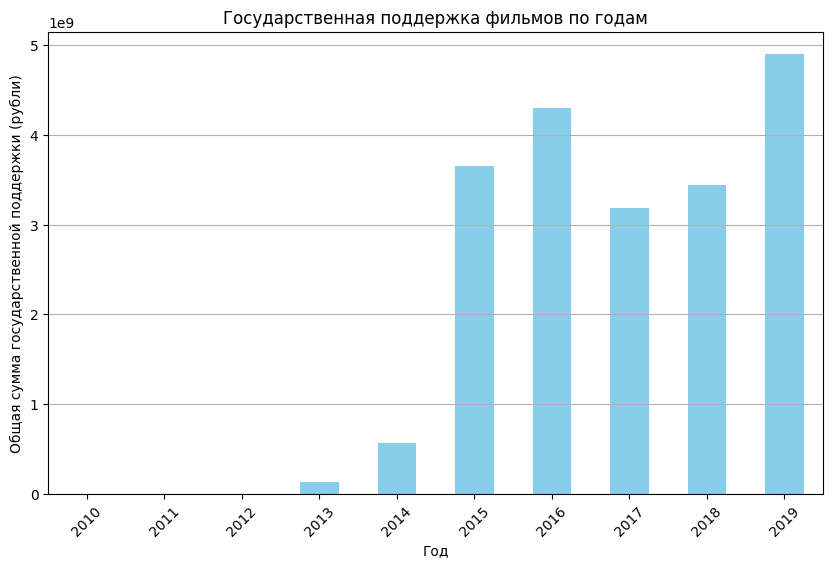

In [65]:
# Гистограмма распределения государственной поддержки фильмов по годам
plt.figure(figsize=(10, 6))
support_by_year.plot(kind='bar', color='skyblue')
plt.title('Государственная поддержка фильмов по годам')
plt.xlabel('Год')
plt.ylabel('Общая сумма государственной поддержки (рубли)')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.show()

**Заключение**: Анализ динамики государственной поддержки фильмов показывает, что размеры поддержки значительно варьируются по годам. Наблюдаются как периоды увеличения, так и уменьшения финансирования, но демонстрирует тенденцию к росту.

In [66]:
# Рассчет общих затрат (бюджет + государственная поддержка)
data['total_costs'] = data['budget'] + data['total_support']

# Рассчет окупаемости (кассовые сборы / общие затраты)
data['profitability'] = data['box_office'] / data['total_costs']

# Анализ окупаемости
profitability_stats = data['profitability'].describe()
print("Статистика окупаемости:\n", profitability_stats)

Статистика окупаемости:
 count    318.000000
mean       0.598021
std        1.240711
min        0.000012
25%        0.015741
50%        0.118748
75%        0.667029
max       13.970767
Name: profitability, dtype: float64


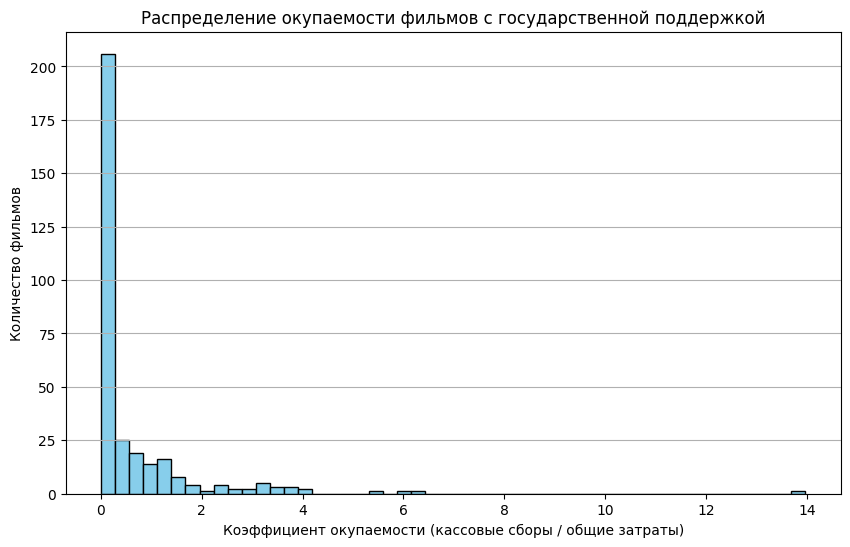

In [67]:
# Построение гистограммы распределения окупаемости
plt.figure(figsize=(10, 6))
plt.hist(data['profitability'], bins=50, color='skyblue', edgecolor='black')
plt.title('Распределение окупаемости фильмов с государственной поддержкой')
plt.xlabel('Коэффициент окупаемости (кассовые сборы / общие затраты)')
plt.ylabel('Количество фильмов')
plt.grid(axis='y')
plt.show()

**Заключение**: Большинство фильмов с государственной поддержкой не окупаются полностью через кассовые сборы. Только небольшая часть фильмов показывает высокую окупаемость, в то время как значительное количество проектов возвращает лишь малую долю своих затрат.

**Промежуточный вывод по разделу**

*Цели и задачи раздела*


Целью данного раздела является анализ фильмов, получивших государственную поддержку, с акцентом на объемы финансирования, окупаемость и рейтинги. Задачи включают оценку эффективности государственной поддержки и выявление закономерностей, связанных с ее предоставлением.

**Основные результаты**
- Объемы государственной поддержки: Объемы государственной поддержки фильмов значительно варьируются по годам. Наблюдается тенденция к росту финансирования, с периодами увеличения и уменьшения средств.
- Окупаемость фильмов: Большинство фильмов с государственной поддержкой не окупаются полностью через кассовые сборы. Средний коэффициент окупаемости составляет около 0.6, что указывает на то, что многие фильмы возвращают лишь малую часть своих затрат. Только небольшая часть фильмов показывает высокую окупаемость.
- Аномалии в данных: Найдено 17 фильмов с бюджетом меньше общей суммы государственной поддержки, что указывает на возможные ошибки в данных или аномалии в процессе финансирования.

В заключение, анализ фильмов с государственной поддержкой выявил значительные проблемы с окупаемостью и некоторые аномалии в данных.

### Шаг 5. Напишите общий вывод

**Цели и задачи проекта**

Проект направлен на исследование рынка российского кинопроката с целью выявления текущих трендов и оценки эффективности государственной поддержки фильмов. Основные задачи включали сбор и предобработку данных, исследовательский анализ и детальное изучение фильмов, получивших государственную поддержку.

**Основные результаты**
*Предобработка данных*:
   - Объединены различные наборы данных, проведена очистка и стандартизация значений.
   - Устранены пропуски и дубликаты, скорректированы аномальные значения.
   - Созданы новые столбцы, необходимые для дальнейшего анализа.

*Исследовательский анализ данных*:
   - Проанализирована динамика выхода фильмов в прокат, выявлена тенденция к росту числа фильмов.
   - Проведен анализ сборов по годам, обнаружены периоды с максимальными и минимальными сборами.
   - Изучено влияние возрастных ограничений на кассовые сборы, выявлено, что фильмы с рейтингами «6+» и «12+» показывают наибольшие сборы.

*Анализ фильмов с государственной поддержкой*:
   - Объемы государственной поддержки демонстрируют тенденцию к росту, но многие фильмы не окупаются через кассовые сборы.
   - Найдены аномалии в данных, требующие дополнительной проверки.

**Анализ всех разделов проекта**
Предобработка данных создала основу для последующего анализа, обеспечив высокое качество данных. Исследовательский анализ данных выявил важные тенденции в российском кинопрокате и влияние различных факторов на сборы фильмов. Анализ фильмов с государственной поддержкой показал, что, несмотря на значительные вложения, окупаемость остается низкой, что требует пересмотра подходов к финансированию.

**Возможные направления дальнейшего развития и применения полученных результатов**
*Углубленный анализ*: Проведение дополнительного анализа для выявления факторов, способствующих успеху фильмов, таких как маркетинг и сезонность выпуска.
*Оптимизация государственной поддержки*: Разработка новых критериев и механизмов оценки эффективности государственной поддержки для повышения окупаемости фильмов.
*Расширение исследования*: Включение в анализ дополнительных данных, таких как зрительские отзывы и рейтинги, для более полной картины рынка кинопроката.

**Общий вывод**
Проект предоставил всестороннее исследование российского рынка кинопроката, выявив ключевые тренды и проблемы, связанные с государственной поддержкой фильмов. Полученные результаты и рекомендации могут быть использованы для оптимизации процессов финансирования и маркетинга в киноиндустрии, способствуя ее дальнейшему развитию и повышению эффективности.